In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

## Esercizio II

In [3]:
df = pd.read_csv('dati.txt', sep=";", na_values=[' '])

In [4]:
df.head()

,PROVINCIA,C6H6,SO2,CO,NO2,O3,O3_GIORNI_SUPERAMENTO_TOLLERANZA,O3_GIORNI_SUPERAMENTO_ALLARME,PM10,PM2_5,Pb,As,Ni,Cd,BaP
0,BG,1.0,3.0,0.5,30.0,55.0,16.0,1.0,30.0,21.0,NaN,NaN,NaN,NaN,NaN
1,BG,NaN,NaN,NaN,24.0,42.0,4.0,0.0,37.0,29.0,0.014,1.5,4.0,0.2,0.5
2,BG,NaN,NaN,NaN,25.0,55.0,23.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BG,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BG,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN


1 - Quante centraline sono presenti in Lombardia?

In [5]:
len(df)

150

2 - Come sono distribuite le centraline nelle diverse province della Lombardia? Rispondere con un grafico.

In [6]:
dist = df.PROVINCIA.value_counts()
dist

MI    36
BG    16
MN    16
PV    13
BS    13
LO    10
CR    10
VA     9
LC     9
MB     7
SO     6
CO     5
Name: PROVINCIA, dtype: int64

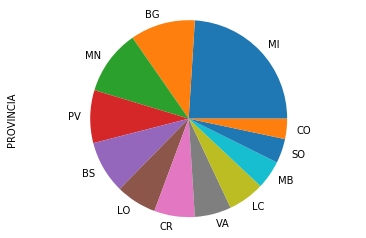

In [7]:
dist.plot.pie()
plt.axis('equal')
plt.show()

3 - Quale provincia è meno rappresentata? Qual è la più rappresentata?

Como, Milano

4 - Calcolare l'indice di eterogeneità per il carattere PROVINCIA e commentare il risultato ottenuto (che cosa mi dice sul carattere PROVINCIA il valore di tale indice?)

Ricordiamo che l'indice di Gini è un indice di eterogeneità che varia tra 0 e 1. Il valore minimo si ha quando tutti i valori del campione sono uguali (eterogeneità minima/omogeneità massima), mentre assume il valore massimo quando tutti gli $n$ elementi del campione appaiono con la medesima frequenza $1/n$:

$$ I = 1 - \sum_{i=1}^n f_i^2 $$

In [8]:
def gini(series):
    return 1 - sum(series.value_counts(normalize=True).map(lambda f: f**2))

In [9]:
print(gini(df.PROVINCIA))

0.8836444444444445


In questo caso il valore di 0.88 ci indica che siamo in presenza di una eterogeneità elevata. Infatti, andiamo da un minimo di 5 centraline per Como ad un massimo di 36 per Milano, con valori piuttosto diversi nel mezzo.

#### Consideriamo le concentrazioni degli inquinanti C6H6, SO2, CO.

5 - Per ciascuno di essi indicare in Tabella 1 media, mediana, deviazione standard e distanza interquartile.

In [10]:
df.C6H6.describe()

count    27.00000
mean      1.32963
std       0.74256
min       0.30000
25%       0.90000
50%       1.10000
75%       1.75000
max       3.60000
Name: C6H6, dtype: float64

6 - Mettere a confronto i tre inquinanti tramite un'opportuna modalità grafica, commentando il grafico ottenuto

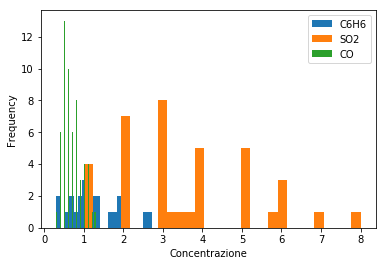

In [11]:
df.C6H6.plot(kind='hist', bins=30, legend=True)
df.SO2.plot(kind='hist', bins=30, legend=True)
df.CO.plot(kind='hist', bins=30, legend=True)
plt.xlabel('Concentrazione')
plt.show()

#### Consideriamo la concentrazione di ozono O3.

9 - Calcolare la tabella delle frequenze relative della concentrazione annuale.

In [12]:
series = df.O3.value_counts()
series / len(series)

47.0    0.296296
42.0    0.259259
50.0    0.185185
44.0    0.185185
40.0    0.185185
55.0    0.148148
48.0    0.148148
37.0    0.148148
46.0    0.148148
45.0    0.111111
41.0    0.111111
38.0    0.111111
60.0    0.074074
43.0    0.074074
35.0    0.074074
39.0    0.074074
61.0    0.037037
56.0    0.037037
34.0    0.037037
93.0    0.037037
53.0    0.037037
51.0    0.037037
52.0    0.037037
59.0    0.037037
49.0    0.037037
54.0    0.037037
58.0    0.037037
Name: O3, dtype: float64

10 - Tracciare il grafico della funzione cumulativa empirica di O3.

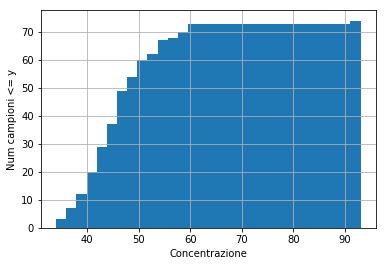

In [13]:
df.O3.hist(bins=30, cumulative=True)
plt.xlabel('Concentrazione')
plt.ylabel('Num campioni <= y')
plt.show()

11 - Quante centraline hanno registrato una concentrazione uguale a 46 mg/mcubo?

4, vedi sotto..

In [14]:
series

47.0    8
42.0    7
50.0    5
44.0    5
40.0    5
55.0    4
48.0    4
37.0    4
46.0    4
45.0    3
41.0    3
38.0    3
60.0    2
43.0    2
35.0    2
39.0    2
61.0    1
56.0    1
34.0    1
93.0    1
53.0    1
51.0    1
52.0    1
59.0    1
49.0    1
54.0    1
58.0    1
Name: O3, dtype: int64

12 - Quante centraline hanno registrato una concentrazione compresa tra i 45 e i 50 mg/mcubo, estremi inclusi?

In [15]:
len(df[(45 <= df.O3) & (df.O3 <= 50)])

25

NOTA: in questo caso "and" non funziona e va sostituito con "&"

oppure possiamo usare un comando diverso:

In [16]:
len(df[df.O3.between(45, 50, inclusive=True)])

25

13 - Indicare quali valori di O3 sono "particolarmente" elevati rispetto agli altri, motivando la risposta con un grafico.

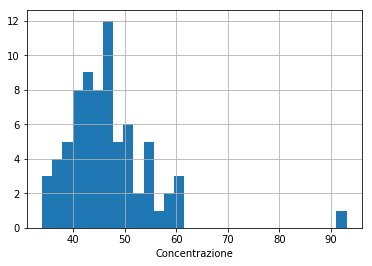

In [17]:
df.O3.hist(bins=30)
plt.xlabel('Concentrazione')
plt.show()

Il valore 93 è particolarmente elevato rispetto al resto.

#### Consideriamo la variabile casuale $X =$ numero dei giorni in un anno nei quali viene superata la soglia di tolleranza per l’ozono. Abbiamo a disposizione il campione casuale $X_1, \ldots , X_n$ di taglia $n = 150$ estratto dalla popolazione $X$ (alla centralina $i$ è associata la variabile $X_i$) e memorizzato nel file scaricato.

13 - Si fornisca una stima del valore atteso e della deviazione standard di X.

In [18]:
df.head()

,PROVINCIA,C6H6,SO2,CO,NO2,O3,O3_GIORNI_SUPERAMENTO_TOLLERANZA,O3_GIORNI_SUPERAMENTO_ALLARME,PM10,PM2_5,Pb,As,Ni,Cd,BaP
0,BG,1.0,3.0,0.5,30.0,55.0,16.0,1.0,30.0,21.0,NaN,NaN,NaN,NaN,NaN
1,BG,NaN,NaN,NaN,24.0,42.0,4.0,0.0,37.0,29.0,0.014,1.5,4.0,0.2,0.5
2,BG,NaN,NaN,NaN,25.0,55.0,23.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BG,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BG,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN


In [19]:
np.mean(df.O3_GIORNI_SUPERAMENTO_TOLLERANZA)

11.207792207792208

In [20]:
np.std(df.O3_GIORNI_SUPERAMENTO_TOLLERANZA)

7.972904866406626

14 - Ci sono buoni motivi per pensare che X segua la legge binomiale? Si giustifichi la risposta.

In generale una distribuzione binomiale di parametri $n, p$ permette di calcolare la probabilità di avere $k$ successi su un numero $n$ di tentativi, dove la probabilità di ogni successo è $p$. 
Nel nostro caso i successi sarebbero intesi come il numero di giorni all'interno dell'anno ($n=365$) in cui la soglia di tolleranza viene superata.

La media di questa distribuzione è $np$, mentre la varianza è $np(1-p)$. Dalle nostre stime abbiamo che:

$$ np = 11.2 $$

e

$$ np(1-p) = 7.97^2 $$

(la deviazione standard è la radice della varianza).

Dal momento che $n=365$, dalla prima equazione otteniamo:

$$ p = 11.2 / 365 \simeq 0.03 $$

E, sostituendo nella seconda:

$$ np(1-p) = 365*0.03(1-0.03) = 10.62 \neq 7.97^2 $$

Abbiamo che la varianza empirica è molto diversa da quella predetta dal modello, per cui l'assunzione di una distribuzione binomiale non è giustificata.